## 步骤一：读取数据
数据在云盘下载

In [1]:
from jaqs.data import DataView 
import warnings

warnings.filterwarnings("ignore")
dataview_folder = './market' 
dv = DataView()
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


## 步骤二：获取沪深分类数据（市值特点）
可获取的板块：[HS300, ZZ500, SZ50, SME, GEM]

HS300（沪深300）反映的是流动性强和规模大的300只代表性股票的股价的综合变动。

ZZ500（中证500）全部A股中剔除沪深300指数成份股及总市值排名前300名的股票后，总市值排名靠前的500只股票组成。

SZ50(上证50)挑选上海证券市场规模大、流动性好的最具代表性的50 只股票组成样本股。

SME(中小板)即中小企业板，是指流通盘大约1亿以下的创业板块。

GEM(创业板)公司大多从事高科技业务，具有较高的成长性，但往往成立时间较短规模较小，业绩也不突出，但有很大的成长空间。

In [2]:
import pandas as pd

hd5_data = pd.HDFStore('./market/data.hd5')
mask_hs300 = hd5_data['HS300']
# 剔除合并股票
mask_hs300.drop(['600005.SH', '000024.SZ', '000562.SZ', '600832.SH', '601299.SH'], axis=1, inplace=True)

## 步骤三：获取分类数据

可获取的分类：[sw1, sw2, sw3, zz1, zz2]

sw1 =  {'480000': '银行', '430000': '房地产', '460000': '休闲服务', '640000': '机械设备', '240000': '有色金属', '510000': '综合', '410000': '公用事业', '450000': '商业贸易', '730000': '通信', '330000': '家用电器', '720000': '传媒', '630000': '电气设备', '270000': '电子', '490000': '非银金融', '370000': '医药生物', '710000': '计算机', '280000': '汽车', '340000': '食品饮料', '220000': '化工', '210000': '采掘', '230000': '钢铁', '650000': '国防军工', '110000': '农林牧渔', '420000': '交通运输', '620000': '建筑装饰', '350000': '纺织服装', '610000': '建筑材料', '360000': '轻工制造'}

sw2 = {'480100': '银行', '420500': '机场', '230100': '钢铁', '280100': '汽车整车', '430100': '房地产开发', '410200': '水务', '410100': '电力', '420200': '高速公路', '420600': '航运', '220100': '石油化工', '420400': '航空运输', '490100': '证券', '640200': '专用设备', '720100': '文化传媒', '650200': '航空装备', '620300': '基础建设', '730100': '通信运营', '510100': '综合', '460100': '景点', '370500': '医疗器械', '450200': '贸易', '370400': '医药商业', '420800': '物流', '340300': '饮料制造', '330200': '视听器材', '220400': '化学纤维', '370100': '化学制药', '430200': '园区开发', '360100': '造纸', '350100': '纺织制造', '270300': '光学光电子', '650400': '船舶制造', '340400': '食品加工', '220500': '塑料', '270400': '其他电子', '220200': '化学原料', '730200': '通信设备', '360200': '包装印刷', '220300': '化学制品', '370300': '生物制品', '280200': '汽车零部件', '370200': '中药', '360300': '家用轻工', '720200': '营销传播', '630400': '高低压设备', '490300': '多元金融', '110200': '渔业', '280400': '其他交运设备', '710100': '计算机设备', '350200': '服装家纺', '110100': '种植业', '240500': '稀有金属', '640100': '通用机械', '240200': '金属非金属新材料', '650100': '航天装备', '210200': '煤炭开采', '450400': '专业零售', '420700': '铁路运输', '110500': '农产品加工', '460300': '旅游综合', '240300': '工业金属', '610300': '其他建材', '240400': '黄金', '630300': '电源设备', '640400': '金属制品', '620100': '房屋建设', '270100': '半导体', '220600': '橡胶', '270200': '元件', '650300': '地面兵装', '110300': '林业', '420100': '港口', '210300': '其他采掘', '110800': '动物保健', '620200': '装修装饰', '610100': '水泥制造', '410400': '环保工程及服务', '620400': '专业工程', '460200': '酒店', '640500': '运输设备', '630200': '电气自动化设备', '710200': '计算机应用', '450300': '一般零售', '490200': '保险', '610200': '玻璃制造', '280300': '汽车服务', '450500': '商业物业经营', '110600': '农业综合', '410300': '燃气', '330100': '白色家电', '210400': '采掘服务', '720300': '互联网传媒', '110400': '饲料', '270500': '电子制造', '420300': '公交', '630100': '电机', '620500': '园林工程', '110700': '畜禽养殖', '370600': '医疗服务', '210100': '石油开采', '640300': '仪器仪表', '360400': '其他轻工制造'}

zz1 = 
{'06': '金融地产', '02': '工业', '01': '原材料', '03': '可选消费', '09': '公用事业', '00': '能源', '08': '电信业务', '05': '医药卫生', '04': '主要消费', '07': '信息技术'}

zz2 = 
{'0601': '银行', '0203': '交通运输', '0101': '原材料', '0301': '汽车与汽车零部件', '0605': '房地产', '0901': '公用事业', '0001': '能源', '0603': '资本市场', '0201': '资本品', '0304': '传媒', '0801': '电信服务', '0202': '商业服务与用品', '0303': '消费者服务', '0501': '医疗器械与服务', '0502': '医药生物', '0402': '食品、饮料与烟草', '0302': '耐用消费品与服装', '0702': '计算机及电子设备', '0802': '通信设备', '0305': '零售业', '0701': '计算机运用', '0703': '半导体', '0403': '家庭与个人用品', '0604': '保险', '0602': '其他金融', '0401': '食品与主要用品零售'}

In [3]:
sw1 = dv.get_ts('sw1')

In [4]:
dict_classify = {'480000': '银行', '430000': '房地产', '460000': '休闲服务', '640000': '机械设备', '240000': '有色金属', '510000': '综合', '410000': '公用事业', '450000': '商业贸易', '730000': '通信', '330000': '家用电器', '720000': '传媒', '630000': '电气设备', '270000': '电子', '490000': '非银金融', '370000': '医药生物', '710000': '计算机', '280000': '汽车', '340000': '食品饮料', '220000': '化工', '210000': '采掘', '230000': '钢铁', '650000': '国防军工', '110000': '农林牧渔', '420000': '交通运输', '620000': '建筑装饰', '350000': '纺织服装', '610000': '建筑材料', '360000': '轻工制造'}

In [5]:
sw1_name = sw1.replace(dict_classify)

In [6]:
sw1_name.tail()

symbol,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20180125,银行,房地产,医药生物,公用事业,房地产,综合,机械设备,综合,建筑装饰,房地产,...,医药生物,电气设备,电子,计算机,化工,有色金属,家用电器,汽车,医药生物,传媒
20180126,银行,房地产,医药生物,公用事业,房地产,综合,机械设备,综合,建筑装饰,房地产,...,医药生物,电气设备,电子,计算机,化工,有色金属,家用电器,汽车,医药生物,传媒
20180129,银行,房地产,医药生物,公用事业,房地产,综合,机械设备,综合,建筑装饰,房地产,...,医药生物,电气设备,电子,计算机,化工,有色金属,家用电器,汽车,医药生物,传媒
20180130,银行,房地产,医药生物,公用事业,房地产,综合,机械设备,综合,建筑装饰,房地产,...,医药生物,电气设备,电子,计算机,化工,有色金属,家用电器,汽车,医药生物,传媒
20180131,银行,房地产,医药生物,公用事业,房地产,综合,机械设备,综合,建筑装饰,房地产,...,医药生物,电气设备,电子,计算机,化工,有色金属,家用电器,汽车,医药生物,传媒


## 步骤四： 编写因子
因子算法参考EXCEL

In [7]:
alpha1 = dv.add_formula('alpha1', '-Correlation(Delta(Log(volume),1),(close-open)/open,6)', is_quarterly=False)

## 步骤五：预处理数据
[signal, price, group, mask, can_enter, can_exit]

In [8]:
import numpy as np

# 定义可买卖条件——未停牌、未涨跌停
def limit_up_down():
    trade_status = dv.get_ts('trade_status').fillna('停牌')
    mask_sus = trade_status == u'停牌'
    # 涨停
    up_limit = dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False)
    # 跌停
    down_limit = dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False)
    can_enter = np.logical_and(up_limit < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(down_limit < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

In [9]:
can_enter,can_exit = limit_up_down()

In [10]:
import numpy as np

alpha1_signal = alpha1[mask_hs300.columns]
price = dv.get_ts('close_adj')[mask_hs300.columns]
hs300_sw1 = sw1_name[mask_hs300.columns]
enter = can_enter[mask_hs300.columns]
exit =  can_exit[mask_hs300.columns]

## 步骤六： 分析因子周期特点
输出最优持有周期与IC，例子{5：0.04}

In [11]:
import matplotlib.pyplot as plt
from jaqs.research import SignalDigger
from jaqs.research.signaldigger import analysis

def cal_obj(signal, name, period, quantile):
#     price_bench = dv.data_benchmark
    obj = SignalDigger(output_folder="hs300/%s" % name,
                       output_format='pdf')
    obj.process_signal_before_analysis(signal,
                                   price=price,
                                   n_quantiles=quantile, period=period,
                                   mask=mask_hs300,
                                   group=hs300_sw1,
                                   can_enter = enter,
                                   can_exit = exit,
                                   commission = 0.0008
                                   )
    obj.create_full_report()
    return obj

def plot_pfm(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    plt.show()
def signal_data(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    return obj.signal_data

In [12]:
period = [1,5,10,20,40,60]

signals_dict = {p:signal_data(alpha1_signal, 'alpha1', p) for p in period} 

Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%


Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -0.999222  0.093926 -0.768286  0.165851  41279  20.150547
2        -0.935065  0.483044 -0.509834  0.235716  40958  19.993849
3        -0.891786  0.705652 -0.259052  0.291666  40976  20.002636
4        -0.826519  0.856653  0.038676  0.327710  40958  19.993849
5        -0.689039  0.996955  0.463084  0.329595  40682  19.859118
Figure saved: C:\Users\small\Desktop\Feb2018\因子复现\hs300\alpha1\returns_report.pdf
Information Analysis
                ic
IC Mean      0.031
IC Std.      0.133
t-stat(IC)   6.289
p-value(IC)  0.000
IC Skew      0.132
IC Kurtosis  0.096
Ann. IR      0.230
Figure saved: C:\Users\small\Desktop\Feb2018\因子复现\hs300\alpha1\information_report.pdf
Nan Data Count (should be zero) : 0;  Percentage of effective dat

In [13]:
ic_pn = pd.Panel({period: analysis.ic_stats(signals_dict[period]) for period in signals_dict.keys()})

In [14]:
alpha1_period = round(ic_pn.minor_xs('return_ic'),2)
print(alpha1_period)

               1     5     10    20    40    60
IC Mean      0.03  0.04  0.02  0.02  0.02  0.02
IC Std.      0.13  0.12  0.13  0.13  0.12  0.12
t-stat(IC)   6.29  7.76  4.39  3.94  4.55  5.13
p-value(IC)  0.00  0.00  0.00  0.00  0.00  0.00
IC Skew      0.13 -0.01  0.20  0.21  0.16  0.17
IC Kurtosis  0.10  0.13  0.12  0.36  0.34  0.20
Ann. IR      0.23  0.28  0.16  0.15  0.17  0.20


In [15]:
OPT_Period = alpha1_period.loc["Ann. IR"].idxmax()
OPT_IC = float("%.2f" % alpha1_period.loc["IC Mean"][OPT_Period])
OPT_IC_Period = {OPT_Period : OPT_IC}

## 步骤七：查看因子行业特点（最优周期）
选择最优的持有周期，计算最近一年(250天)，两年（500天），三年（750天）的平均行业IC，再求其平均IC，输出IC大于0.05与小于-0.05的行业

In [16]:
signal = signal_data(alpha1_signal, 'alpha1', period=OPT_Period, quantile=5)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%


Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -0.999222  0.093926 -0.768286  0.165851  41279  20.150547
2        -0.935065  0.483044 -0.509834  0.235716  40958  19.993849
3        -0.891786  0.705652 -0.259052  0.291666  40976  20.002636
4        -0.826519  0.856653  0.038676  0.327710  40958  19.993849
5        -0.689039  0.996955  0.463084  0.329595  40682  19.859118
Figure saved: C:\Users\small\Desktop\Feb2018\因子复现\hs300\alpha1\returns_report.pdf
Information Analysis
                ic
IC Mean      0.035
IC Std.      0.124
t-stat(IC)   7.758
p-value(IC)  0.000
IC Skew     -0.013
IC Kurtosis  0.134
Ann. IR      0.285
Figure saved: C:\Users\small\Desktop\Feb2018\因子复现\hs300\alpha1\information_report.pdf


In [17]:
def ic_length(signal, days=250):
    return signal.loc[signal.index.levels[0][-days]:]

In [18]:
from jaqs.research.signaldigger import performance as pfm

length_dict = {}
for length in [750,500,250]:
    ic = pfm.calc_signal_ic(ic_length(signal, days=length), by_group=True)
    mean_ic_by_group = pfm.mean_information_coefficient(ic, by_group=True)
    length_dict[length] = round(mean_ic_by_group,2)

In [19]:
ic_industry = pd.Panel(length_dict).minor_xs('ic')

In [20]:
ic_industry = ic_industry.rename_axis({750:'Three_Year', 500:'Two_Year', 250:'One_Year'}, axis=1)

In [21]:
ic_industry['Mean'] = round(ic_industry.mean(axis=1),2)

In [22]:
High_IC_Industry = list(ic_industry['Mean'][ic_industry['Mean']>=OPT_IC].index)
Low_IC_Industry = list(ic_industry['Mean'][ic_industry['Mean']<=-OPT_IC].index)

In [23]:
High_IC_Industry

['公用事业', '农林牧渔', '化工', '国防军工', '家用电器', '建筑装饰', '电子', '食品饮料']

## 最终： 输出因子描述的Series
'name':'alpha1' #str 因子名称

'data': ['volume','close','open'] #数据元素

'type':'价量类' #str 因子类型（价量类(用了volume,VWAP)，价格类(只有OHLC)，波幅类(用到return)...）

'market':'hs300' #str 市值板块（HS300,ZZ500,SZ50,SME,GEM）

'classify':'sw1' #str 板块分类（sw1,sw2,sw3,zz1,zz2）

'Formula':'-Correlation(Delta(Log(volume),{}),(close-open)/open,{})' #str 因子算法

'parameter':[1,6] #list 参数对应算法参数的位置顺序

'description':'对数成交量的1天差与当天涨跌幅的过去6天相关系数' #str 因子详细描述

'High_IC_Industry': High_IC_Industry # 大于最优IC均值的板块

'Low_IC_Industry':Low_IC_Industry # 小于最优-IC均值的板块

'Best_Period' : Max_IC_Period}) #最优持有周期与IC

In [24]:
pd.Series({'name':'alpha1','data': ['volume','close','open'] ,'type':'价量类','market':'hs300','classify':'sw1','Formula':'-Correlation(Delta(Log(volume),{}),(close-open)/open,{})','parameter':[1,6],'description':'对数成交量的1天差与当天涨跌幅的过去6天相关系数','High_IC_Industry': High_IC_Industry, 'Low_IC_Industry':Low_IC_Industry, 'Best_Period' : OPT_IC_Period})

Best_Period                                                 {5: 0.04}
Formula             -Correlation(Delta(Log(volume),{}),(close-open...
High_IC_Industry         [公用事业, 农林牧渔, 化工, 国防军工, 家用电器, 建筑装饰, 电子, 食品饮料]
Low_IC_Industry                                    [休闲服务, 商业贸易, 纺织服装]
classify                                                          sw1
data                                            [volume, close, open]
description                                  对数成交量的1天差与当天涨跌幅的过去6天相关系数
market                                                          hs300
name                                                           alpha1
parameter                                                      [1, 6]
type                                                              价量类
dtype: object

## 画图观察（可省略）
需要翻译中文名称

In [25]:
dict_rename = {'480000': 'Bank', '430000': 'Real_Estate', '460000': 'Leisure_Service', '640000': 'Mechanical_Equipment', '240000': 'Nonferrous_Metals', '510000': 'Synthesis', '410000': 'Public_Utility', '450000': 'Commercial_Trade', '730000': 'Communication', '330000': 'Household_Appliances', '720000': 'Media', '630000': 'Electrical_Equipment', '270000': 'Electronic_Engineering', '490000': 'Non_Bank_Finance', '370000': 'Medical_Biology', '710000': 'Computer', '280000': 'Car', '340000': 'Food_Beverage', '220000': 'Chemical_Engineering', '210000': 'Digging', '230000': 'Steel', '650000': 'Military', '110000': 'Agriculture_Fishing', '420000': 'Transportation', '620000': 'Architectural_Ornament', '350000': 'Textile_Garment', '610000': 'Building_Materials', '360000': 'Light_Manufacturing'}

In [26]:
name_df = pd.concat([pd.Series(dict_classify), pd.Series(dict_rename)], axis=1)

In [27]:
def change_english(mean_ic, name_df):
    English_Name = {}
    for index, name in name_df.iterrows():
        English_Name[name[0]]=name[1]
    return mean_ic.rename(English_Name)

In [28]:
ic_industry_eng = change_english(ic_industry, name_df)

In [29]:
ic_industry_eng['Mean'] = round(ic_industry_eng.mean(axis=1),2)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
ic_industry_length = {key: round(ic_industry_eng[key].sort_values(ascending=False),2) for key in ic_industry_eng.columns}

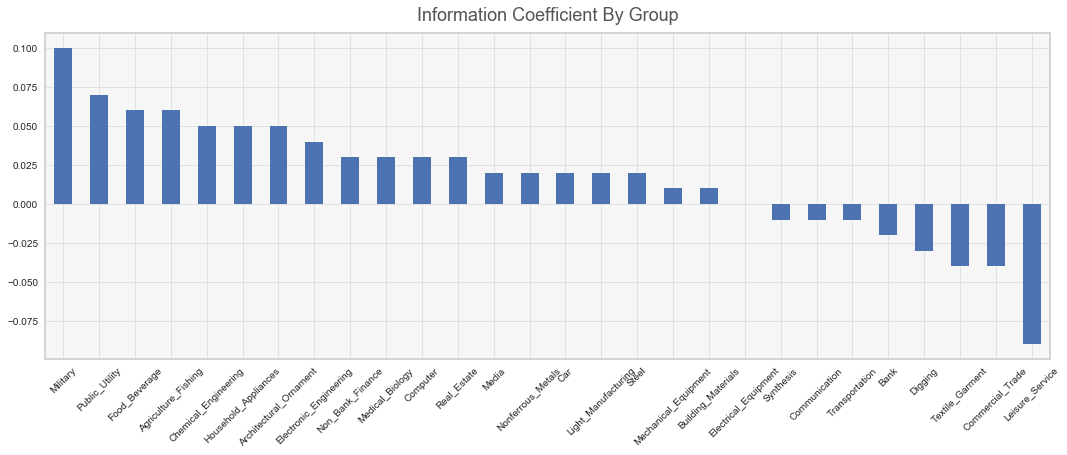

In [32]:
from jaqs.research.signaldigger import plotting
plotting.plot_ic_by_group(ic_industry_length['Mean'])